Plot the interactions Jij (Exchange) and Dij (DMI) between atoms i and j. 

The format of Jij files is:

i j rx ry rz  jij  dist

1 2  0  0  1  1.0  0.7

The format of Dij (dx,dy,dz) files is:

i j rx ry rz dx dy dz dist

1 2  0  0  1  0  1  0 0.7

Note that it is possible to have different values of interaction for the same distance. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams.update({'font.size': 15})

# Exchange

In [5]:
jiFeFe = np.loadtxt('jij-iFe-Fe')
jiFePd = np.loadtxt('jij-iFe-Pd')
jiPdFe = np.loadtxt('jij-iPd-Fe')
jfenn48 = np.loadtxt('jij-fenn-48')
jfenn53 = np.loadtxt('jij-fenn-53')


jiFeFe = pd.DataFrame(jiFeFe)
jiFePd = pd.DataFrame(jiFePd)
jiPdFe = pd.DataFrame(jiPdFe)
jfenn48 = pd.DataFrame(jfenn48)
jfenn53 = pd.DataFrame(jfenn53)

jiFeFe.columns = ['i','j','rx','ry','rz','jij','dist']
jiFeFe = jiFeFe.astype({"i": int, "j": int})

jiFePd.columns = ['i','j','rx','ry','rz','jij','dist']
jiFePd = jiFePd.astype({"i": int, "j": int})

jiPdFe.columns = ['i','j','rx','ry','rz','jij','dist']
jiPdFe = jiPdFe.astype({"i": int, "j": int})

jfenn48.columns = ['i','j','rx','ry','rz','jij','dist']
jfenn48 = jfenn48.astype({"i": int, "j": int})

jfenn53.columns = ['i','j','rx','ry','rz','jij','dist']
jfenn53 = jfenn53.astype({"i": int, "j": int})


In [6]:
### transform the unit from mRy to meV
jiFeFe.loc[:,'jij']*=13.6
jiFePd.loc[:,'jij']*=13.6
jiPdFe.loc[:,'jij']*=13.6
jfenn48.loc[:,'jij']*=13.6
jfenn53.loc[:,'jij']*=13.6

jiFeFe = jiFeFe.round({'jij':2,'dist':4})
jiFePd = jiFePd.round({'jij':2,'dist':4})
jiPdFe = jiPdFe.round({'jij':2,'dist':4})
jfenn48 = jfenn48.round({'jij':2,'dist':4})
jfenn53 = jfenn53.round({'jij':2,'dist':4})


### find the unique values of interaction in each dataframe
jiFeFe = jiFeFe.drop_duplicates(subset=['jij'])
jiFeFe.drop(jiFeFe[jiFeFe['j']==39].index, inplace=True)

jiFePd = jiFePd.drop_duplicates(subset=['jij'])

jiPdFe = jiPdFe.drop_duplicates(subset=['jij'])

jfenn48 = jfenn48.drop_duplicates(subset=['jij'])
jfenn48.drop(jfenn48[jfenn48['j']==39].index, inplace=True)

jfenn53 = jfenn53.drop_duplicates(subset=['jij'])
jfenn53.drop(jfenn53[jfenn53['j']==39].index, inplace=True)

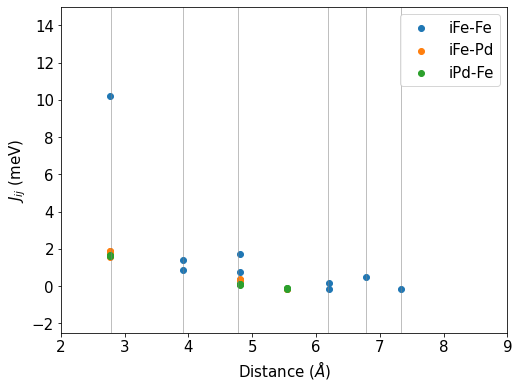

In [8]:
fig1 = plt.figure(figsize=(8,6))


jij = jiFeFe['jij'].to_numpy()
dist = jiFeFe['dist'].to_numpy()
plt.scatter(dist*3.92,jij, label='iFe-Fe')

jij = jiFePd['jij'].to_numpy()
dist = jiFePd['dist'].to_numpy()
plt.scatter(dist*3.92,jij, label='iFe-Pd')

jij = jiPdFe['jij'].to_numpy()
dist = jiPdFe['dist'].to_numpy()
plt.scatter(dist*3.92,jij, label='iPd-Fe')

d = jiFeFe['dist'].round(2).unique()

plt.vlines(d[0]*3.92,-2.5,15, color='gray', linewidth=0.5)
plt.vlines(d[1]*3.92,-2.5,15, color='gray', linewidth=0.5)
plt.vlines(d[2]*3.92,-2.5,15, color='gray', linewidth=0.5)
plt.vlines(d[3]*3.92,-2.5,15, color='gray', linewidth=0.5)
plt.vlines(d[4]*3.92,-2.5,15, color='gray', linewidth=0.5)
plt.vlines(d[5]*3.92,-2.5,15, color='gray', linewidth=0.5)

plt.ylim([-2.5,15])
plt.xlim([2,9])

plt.xlabel('Distance ($\AA$)')
plt.ylabel('$J_{ij}$ (meV)')
plt.legend()
plt.savefig('a-j1.png')

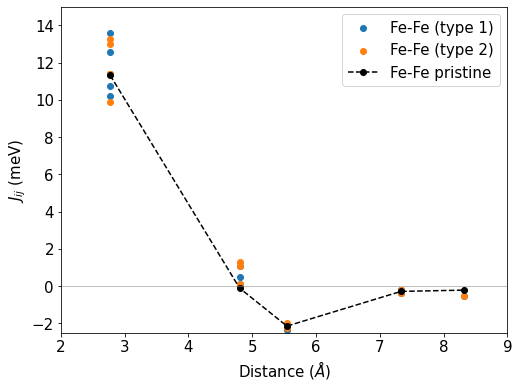

In [9]:
fig1 = plt.figure(figsize=(8,6))

prist = np.array([0.832467, -0.00734, -0.157329, -0.020453, -0.015478])*13.6
d = np.array([0.707107, 1.224745, 1.414214, 1.870829, 2.12132])

jij = jfenn48['jij'].to_numpy()
dist = jfenn48['dist'].to_numpy()
plt.scatter(dist*3.92,jij, label='Fe-Fe (type 1)')

jij = jfenn53['jij'].to_numpy()
dist = jfenn53['dist'].to_numpy()
plt.scatter(dist*3.92,jij, label='Fe-Fe (type 2)')

plt.plot(d*3.92, prist, '--ok', label=('Fe-Fe pristine'))
plt.hlines(0,2,9, color='gray', linewidth=0.5)
plt.xlim([2,9])
plt.ylim([-2.5,15])
plt.xlabel('Distance ($\AA$)')
plt.ylabel('$J_{ij}$ (meV)')
plt.legend()
plt.savefig('a-j2.png')

# DMI

In [2]:
diFeFe = np.loadtxt('dij-iFe-Fe')
diFePd = np.loadtxt('dij-iFe-Pd')
diPdFe = np.loadtxt('dij-iPd-Fe')
jfenn48 = np.loadtxt('dij-fenn-48')
jfenn53 = np.loadtxt('dij-fenn-53')


diFeFe = pd.DataFrame(diFeFe)
diFePd = pd.DataFrame(diFePd)
diPdFe = pd.DataFrame(diPdFe)
dfenn48 = pd.DataFrame(jfenn48)
dfenn53 = pd.DataFrame(jfenn53)

diFeFe.columns = ['i','j','rx','ry','rz','dx','dy' , 'dz', 'dist']
diFeFe = diFeFe.astype({"i": int, "j": int})

diFePd.columns = ['i','j','rx','ry','rz','dx','dy' , 'dz','dist']
diFePd = diFePd.astype({"i": int, "j": int})

diPdFe.columns = ['i','j','rx','ry','rz','dx','dy' , 'dz','dist']
diPdFe = diPdFe.astype({"i": int, "j": int})

dfenn48.columns = ['i','j','rx','ry','rz','dx','dy' , 'dz','dist']
dfenn48 = dfenn48.astype({"i": int, "j": int})

dfenn53.columns = ['i','j','rx','ry','rz','dx','dy' , 'dz','dist']
dfenn53 = dfenn53.astype({"i": int, "j": int})


In [3]:
diFeFe['norm'] = np.sqrt(diFeFe['dx']**2 + diFeFe['dy']**2 + diFeFe['dz']**2)*13.6
diFePd['norm'] = np.sqrt(diFePd['dx']**2 + diFePd['dy']**2 + diFePd['dz']**2)*13.6
diPdFe['norm'] = np.sqrt(diPdFe['dx']**2 + diPdFe['dy']**2 + diPdFe['dz']**2)*13.6
dfenn48['norm'] = np.sqrt(dfenn48['dx']**2 + dfenn48['dy']**2 + dfenn48['dz']**2)*13.6
dfenn53['norm'] = np.sqrt(dfenn53['dx']**2 + dfenn53['dy']**2 + dfenn53['dz']**2)*13.6


diFeFe = diFeFe.round({'norm':2,'dist':4})
diFePd = diFePd.round({'norm':2,'dist':4})
diPdFe = diPdFe.round({'norm':2,'dist':4})
dfenn48 = dfenn48.round({'norm':2,'dist':4})
dfenn53 = dfenn53.round({'norm':2,'dist':4})

diFeFe = diFeFe.drop_duplicates(subset=['norm'])
diFeFe.drop(diFeFe[diFeFe['j']==39].index, inplace=True)

diFePd = diFePd.drop_duplicates(subset=['norm'])

diPdFe = diPdFe.drop_duplicates(subset=['norm'])

dfenn48 = dfenn48.drop_duplicates(subset=['norm'])
dfenn48.drop(dfenn48[dfenn48['j']==39].index, inplace=True)

dfenn53 = dfenn53.drop_duplicates(subset=['norm'])
dfenn53.drop(dfenn53[dfenn53['j']==39].index, inplace=True)

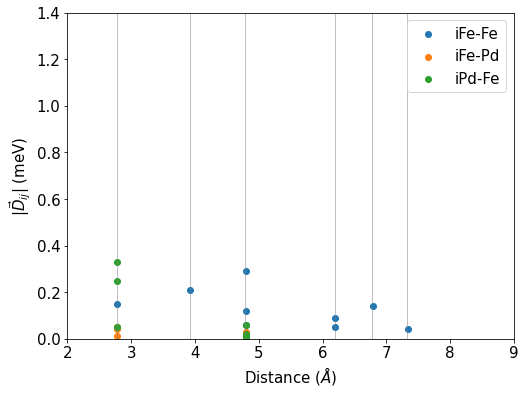

In [7]:
fig1 = plt.figure(figsize=(8,6))

dij = diFeFe['norm'].to_numpy()
dist = diFeFe['dist'].to_numpy()
plt.scatter(dist*3.92,dij, label='iFe-Fe')

dij = diFePd['norm'].to_numpy()
dist = diFePd['dist'].to_numpy()
plt.scatter(dist*3.92,dij, label='iFe-Pd')

dij = diPdFe['norm'].to_numpy()
dist = diPdFe['dist'].to_numpy()
plt.scatter(dist*3.92,dij, label='iPd-Fe')

plt.xlim([2,9])
plt.ylim([0,1.4])

d = diFeFe['dist'].round(2).unique()

plt.vlines(d[0]*3.92,0,1.4, color='gray', linewidth=0.5)
plt.vlines(d[1]*3.92,0,1.4, color='gray', linewidth=0.5)
plt.vlines(d[2]*3.92,0,1.4, color='gray', linewidth=0.5)
plt.vlines(d[3]*3.92,0,1.4, color='gray', linewidth=0.5)
plt.vlines(d[4]*3.92,0,1.4, color='gray', linewidth=0.5)
plt.vlines(d[5]*3.92,0,1.4, color='gray', linewidth=0.5)

plt.xlabel('Distance ($\AA$)')
plt.ylabel('|$\\vec{D}_{ij}$| (meV)')
plt.legend()
plt.savefig('a-dmi1.png')

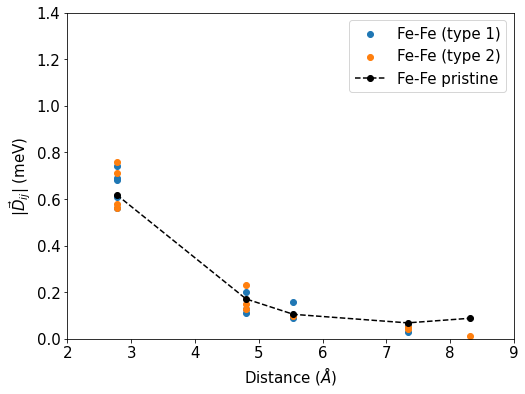

In [6]:
fig1 = plt.figure(figsize=(8,6))

prist = np.array([0.04544777, 0.012574, 0.00772201, 0.00502604, 0.00648465])*13.6
d = np.array([0.707107, 1.224745, 1.414214, 1.870829, 2.12132])

dij = dfenn48['norm'].to_numpy()
dist = dfenn48['dist'].to_numpy()
plt.scatter(dist*3.92,dij, label='Fe-Fe (type 1)')

dij = dfenn53['norm'].to_numpy()
dist = dfenn53['dist'].to_numpy()
plt.scatter(dist*3.92,dij, label='Fe-Fe (type 2)')

plt.plot(d*3.92, prist, '--ok', label=('Fe-Fe pristine'))
plt.hlines(0,2,9, color='gray', linewidth=0.5)
plt.xlim([2,9])
plt.ylim([0,1.4])
plt.xlabel('Distance ($\AA$)')
plt.ylabel('|$\\vec{D}_{ij}$| (meV)')
plt.legend()
plt.savefig('a-dmi2.png')